Importar las librerias que se necesitan

In [1]:
import pandas as pd
import os
import glob
import yfinance as yf
from datetime import datetime
import math
import numpy as np
import requests
from bs4 import BeautifulSoup

Descargar los datos necesarios desde Yahoo Finance (se puede automatizar con airflow)

In [2]:
"""

## PARA DESCARGAR LA NUEVA INFORMACION - TARDÓ 120 Minutos, 87 Minutos 
# Ruta al directorio donde se encuentran los archivos CSV
directorio = 'C:/Users/Leidy Hernandez/Desktop/Soy Henry/Proyecto integrador/fh_20181104/full_history'

# Patrón para buscar archivos CSV
patron = '*.csv'

# Obtener la ruta de directorio de cada uno
archivos_csv = glob.glob(os.path.join(directorio, patron))

# Descargar los datos de Yahoo Finance y almacenarlos en un DataFrame por cada stock
for archivo_csv in archivos_csv:
    # Obtener el símbolo del stock desde el nombre del archivo
    nombre_archivo = os.path.basename(archivo_csv)
    simbolo = nombre_archivo.split('.')[0]  # Suponemos que el nombre del archivo es el símbolo del stock
    
    # Descargar los datos desde Yahoo Finance para los últimos 10 años
    data = yf.download(simbolo, start='2013-01-01')
    
    # Filtrar las columnas necesarias (Precio de apertura, cierre, cierre ajustado y volumen)
    data = data[['Open', 'Close', 'Adj Close', 'Volume']]
    
    # Guardar los datos en un nuevo archivo CSV
    nuevo_nombre_archivo = f'{simbolo}.csv'
    ruta_nuevo_archivo = os.path.join(directorio, nuevo_nombre_archivo)
    data.to_csv(ruta_nuevo_archivo)

"""

"\n\n## PARA DESCARGAR LA NUEVA INFORMACION - TARDÓ 120 Minutos, 87 Minutos \n# Ruta al directorio donde se encuentran los archivos CSV\ndirectorio = 'C:/Users/Leidy Hernandez/Desktop/Soy Henry/Proyecto integrador/fh_20181104/full_history'\n\n# Patrón para buscar archivos CSV\npatron = '*.csv'\n\n# Obtener la ruta de directorio de cada uno\narchivos_csv = glob.glob(os.path.join(directorio, patron))\n\n# Descargar los datos de Yahoo Finance y almacenarlos en un DataFrame por cada stock\nfor archivo_csv in archivos_csv:\n    # Obtener el símbolo del stock desde el nombre del archivo\n    nombre_archivo = os.path.basename(archivo_csv)\n    simbolo = nombre_archivo.split('.')[0]  # Suponemos que el nombre del archivo es el símbolo del stock\n    \n    # Descargar los datos desde Yahoo Finance para los últimos 10 años\n    data = yf.download(simbolo, start='2013-01-01')\n    \n    # Filtrar las columnas necesarias (Precio de apertura, cierre, cierre ajustado y volumen)\n    data = data[['Op

Se extraen los nombres de las acciones de NASDAQ y NYSE

In [44]:
# Ruta al directorio donde se encuentran los archivos CSV
directorio = 'C:/Users/Leidy Hernandez/Desktop/Soy Henry/Proyecto integrador/fh_20181104/full_history'

# Patrón para buscar archivos CSV
patron = '*.csv'

# Obtener la ruta de directorio de cada uno
archivos_csv = glob.glob(os.path.join(directorio, patron))

# Lista para almacenar los nombres de los archivos CSV
nombres_archivos_csv = []

# Extraer el nombre de cada archivo CSV
for archivo in archivos_csv:
    nombres_archivos_csv.append(os.path.basename(archivo))

Se crea un DataFrame por cada Stock

In [45]:
# Lista para almacenar los DataFrames de los archivos CSV
dataframes_csv = []
# Leer cada archivo CSV y almacenar el DataFrame correspondiente
for i in range(len(nombres_archivos_csv)):
    ruta_archivo = directorio + '/' + nombres_archivos_csv[i]  # Ruta completa al archivo
    df = pd.read_csv(ruta_archivo)
    dataframes_csv.append(df)

# Crea el DF por accion
for i in range(len(nombres_archivos_csv)):
    # Extraer un nombre de la lista
    nombre_variable = nombres_archivos_csv[i].replace('.csv','')
    # Asignar un valor a la variable con el nombre extraído
    globals()[nombre_variable] = dataframes_csv[i]

Se crea una lista con el nombre de cada stock (No la ruta del archivo)

In [46]:
# Extraer sólo el nombre del stock
for i in range(len(nombres_archivos_csv)):
    nombres_archivos_csv[i] = nombres_archivos_csv[i].replace('.csv','')

Se empiezan a eliminar los Stocks que no se pueden utilizar 

Se eliminan los df que no tengan datos, que no tengan histórico desde el primer día hábil del 2013, que no estén cotizando para el día hábil más cercano de cuando descargamos los datos, y que tengan información continua (que no falte ninguna cotización)

In [47]:
archivos_inutiles = []
length = len(globals()[nombres_archivos_csv[0]]['Date'])
ult_fecha = A['Date'][len(A['Date'])-1]

# Iterar sobre los nombres de archivos CSV
for nombre_archivo in nombres_archivos_csv:
    dataframe = globals()[nombre_archivo]
    fecha = dataframe['Date']
    
    if len(fecha) != length or fecha[0] != '2013-01-02'  or fecha[len(fecha) - 1] != ult_fecha:
        archivos_inutiles.append(nombre_archivo)

# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for nombre_archivo in archivos_inutiles:
    nombre_dataframe = nombre_archivo.replace('.csv', '')
    del globals()[nombre_dataframe]
    nombres_archivos_csv.remove(nombre_archivo)

Calcular Desviación Estandard y rango de precios 

In [ ]:
"""# ESTÁ EN EL ARCHIVO DE METRICS
metrics = pd.DataFrame()

metrics['Stock'] = nombres_archivos_csv
std = []

for i in range(len(metrics['Stock'])):
    std.append(np.std(globals()[metrics['Stock'][i]]['Adj Close']))

metrics['Standard Deviation'] = std"""


In [ ]:
"""# ESTÁ EN EL ARCHIVO DE METRICS
r_min = []
r_max = []
fecha = '2023-07-14'    ## Fecha de 'Ayer', del dia anterior para basarse ena estimación del precio de "hoy" (Siempre tiene que ser de días hábiles)
indice = globals()[metrics['Stock'][0]].loc[A['Date'] == fecha].index[0]    ## Como todos los archivos tienen la misma cantidad de datos, si en uno se encuentra la fecha en x 
                                                                            ## posicion entonces en esa misma estará para todos los demás df
for i in range(len(metrics['Stock'])):
    r_min.append(globals()[metrics['Stock'][i]]['Close'][indice] - metrics['Standard Deviation'][i])
    r_max.append(globals()[metrics['Stock'][i]]['Close'][indice] + metrics['Standard Deviation'][i])

metrics['Rango Mínimo Estimado'] = r_min
metrics['Rango Máximo Estimado'] = r_max"""

Calcular rendimientos diarios, mensuales y anuales con su respectivo promedio

In [7]:
## PARA CALCULAR LOS RENDIMIENTOS DIARIOS -> (Pf/Pi)-1

for j in range(len(nombres_archivos_csv)):
    nombre_archivo = nombres_archivos_csv[j]
    dataframe = globals()[nombre_archivo]
    dataframe['Rendimientos diarios (%)'] = np.nan
    adj_close = dataframe['Adj Close']
    rendimientos = [((adj_close[i] / adj_close[i-1]) - 1)*100 for i in range(1, len(adj_close))]
    dataframe['Rendimientos diarios (%)'][1:] = rendimientos

C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_14680\90114443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Rendimientos diarios (%)'][1:] = rendimientos
C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_14680\90114443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Rendimientos diarios (%)'][1:] = rendimientos
C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_14680\90114443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [10]:
"""## CALCULAR PROMEDIO DE RENDIMIENTOS DIARIOS POR STOCK
# ESTÁ EN EL ARCHIVO DE METRICS
p_rend = []
for i in range(len(metrics['Stock'])):
    p_rend.append(np.mean(globals()[metrics['Stock'][i]]['Rendimientos diarios (%)']))
metrics['Rendimiento promedio diario (%)'] = p_rend"""

"## CALCULAR PROMEDIO DE RENDIMIENTOS DIARIOS POR STOCK\n# ESTÁ EN EL ARCHIVO DE METRICS\np_rend = []\nfor i in range(len(metrics['Stock'])):\n    p_rend.append(np.mean(globals()[metrics['Stock'][i]]['Rendimientos diarios (%)']))\nmetrics['Rendimiento promedio diario (%)'] = p_rend"

In [11]:
"""## CALCULAR PROMEDIO DE RENDIMIENTOS MENSUALES POR STOCK
# ESTÁ EN EL ARCHIVO DE METRICS
# Crear un diccionario para almacenar los DataFrames con los rendimientos mensuales
rendimientos_mensuales = {}

# Calcular el rendimiento mensual para cada DataFrame
for nombre_archivo in nombres_archivos_csv:
    dataframe = globals()[nombre_archivo]

    # Antes de aplicar resample, convertimos la columna 'Date' en un índice de fecha
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    
    # Agrupar los datos por año y mes y obtener el primer y último valor de "Adj Close" de cada mes
    monthly_data = dataframe.resample('M', on='Date').agg({'Adj Close': ['first', 'last']})
    
    # Calcular el rendimiento del mes
    monthly_data['Rendimiento mensual (%)'] = (monthly_data['Adj Close']['last'] / monthly_data['Adj Close']['first'] - 1) * 100
    
    # Almacenar el DataFrame con los rendimientos mensuales en el diccionario
    rendimientos_mensuales[nombre_archivo] = monthly_data"""


'## CALCULAR PROMEDIO DE RENDIMIENTOS MENSUALES POR STOCK\n# ESTÁ EN EL ARCHIVO DE METRICS\n# Crear un diccionario para almacenar los DataFrames con los rendimientos mensuales\nrendimientos_mensuales = {}\n\n# Calcular el rendimiento mensual para cada DataFrame\nfor nombre_archivo in nombres_archivos_csv:\n    dataframe = globals()[nombre_archivo]\n\n    # Antes de aplicar resample, convertimos la columna \'Date\' en un índice de fecha\n    dataframe[\'Date\'] = pd.to_datetime(dataframe[\'Date\'])\n    \n    # Agrupar los datos por año y mes y obtener el primer y último valor de "Adj Close" de cada mes\n    monthly_data = dataframe.resample(\'M\', on=\'Date\').agg({\'Adj Close\': [\'first\', \'last\']})\n    \n    # Calcular el rendimiento del mes\n    monthly_data[\'Rendimiento mensual (%)\'] = (monthly_data[\'Adj Close\'][\'last\'] / monthly_data[\'Adj Close\'][\'first\'] - 1) * 100\n    \n    # Almacenar el DataFrame con los rendimientos mensuales en el diccionario\n    rendimientos

In [12]:
"""## CALCULAR PROMEDIO DE RENDIMIENTOS MENSUALES POR STOCK
# ESTÁ EN EL ARCHIVO DE METRICS
p_rend = []
for i in range(len(metrics['Stock'])):
    p_rend.append(np.mean(rendimientos_mensuales[metrics['Stock'][i]]['Rendimiento mensual (%)']))
metrics['Rendimiento promedio mensual (%)'] = p_rend"""

"## CALCULAR PROMEDIO DE RENDIMIENTOS MENSUALES POR STOCK\n# ESTÁ EN EL ARCHIVO DE METRICS\np_rend = []\nfor i in range(len(metrics['Stock'])):\n    p_rend.append(np.mean(rendimientos_mensuales[metrics['Stock'][i]]['Rendimiento mensual (%)']))\nmetrics['Rendimiento promedio mensual (%)'] = p_rend"

In [190]:
"""## CALCULAR PROMEDIO DE RENDIMIENTOS ANUALES POR STOCK
# ESTÁ EN EL ARCHIVO DE METRICS
# Crear un diccionario para almacenar los DataFrames con los rendimientos mensuales
rendimientos_anuales = {}

# Calcular el rendimiento mensual para cada DataFrame
for nombre_archivo in nombres_archivos_csv:
    dataframe = globals()[nombre_archivo]
    
    # Antes de aplicar resample, convertimos la columna 'Date' en un índice de fecha
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    
    # Agrupar los datos por año y mes y obtener el primer y último valor de "Adj Close" de cada mes
    annual_data = dataframe.resample('A', on='Date').agg({'Adj Close': ['first', 'last']})
    
    # Calcular el rendimiento del mes
    annual_data['Rendimiento Anual (%)'] = (annual_data['Adj Close']['last'] / annual_data['Adj Close']['first'] - 1) * 100
    
    # Almacenar el DataFrame con los rendimientos mensuales en el diccionario
    rendimientos_anuales[nombre_archivo] = annual_data"""

In [191]:
"""## CALCULAR PROMEDIO DE RENDIMIENTOS ANUALES POR STOCK
# ESTÁ EN EL ARCHIVO DE METRICS
p_rend = []
for i in range(len(metrics['Stock'])):
    p_rend.append(np.mean(rendimientos_anuales[metrics['Stock'][i]]['Rendimiento Anual (%)']))
metrics['Rendimiento promedio anual (%)'] = p_rend"""

Calcular volatilidad utilizando los métodos Historical Volatility (HV) y Realized Volatility (RV) 

In [192]:
"""## METODO "Historical Volatility (HV)" 
    # HV = √VAR * √N
    # VAR = SD/N

var = []
HV = []
dias_negociados = len(A['Date'])
for i in range(len(metrics['Stock'])):
    var.append((metrics['Standard Deviation'][i])/(dias_negociados))
    HV.append(math.sqrt(var[i]) * math.sqrt(dias_negociados))
metrics['Historical Volatility'] = HV"""

In [193]:
"""## METODO "Realized Volatility (RV)" 
    # RV = √((∑SDR)/N)
    # SDR = (Daily return)^2
SDR = []  # Para agregar la suma de cada stock

for j in range(len(metrics['Stock'])):
    sdr = []  # Reiniciar la lista de SDR para cada stock
    for i in range(1, dias_negociados):
        sdr.append((globals()[metrics['Stock'][j]]['Rendimientos diarios (%)'][i]) ** 2)
    SDR.append(sum(sdr))

# Ahora calculamos la volatilidad (RV) para cada stock
metrics['Realized Volatility'] = [((sdr_sum / dias_negociados) ** 0.5) for sdr_sum in SDR]"""


    Baja volatilidad: Menos del 10% de desviación estándar.
    Volatilidad moderada: Entre el 10% y el 20% de desviación estándar.
    Alta volatilidad: Más del 20% de desviación estándar.

### Calcular valor intrínseco 

    Primero hay que calcular:
        Terminal Value (TV) 
        Terminal Growth Rate (g)
        Retention Ratio ***

Calcular Retention Ratio

* NET INCOME

In [90]:
## WEB SCRAPING PARA EXTRAER EL NET INCOME

def get_net_income(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials/income"

    # Realizar una solicitud GET a la página web
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de respuesta 200)
    if response.status_code == 200:
        # Parsear el contenido HTML de la página con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscar el elemento que contiene el net income
        net_income_element = soup.find("div", class_="cell__content", string="Net Income")

        if net_income_element:
            # Obtener todas las etiquetas div con clase "cell__content" dentro de la fila del net income
            net_income_values = net_income_element.find_parent("tr").find_all("div", class_="cell__content")

            # Acceder al penúltimo elemento de la lista para obtener el valor del net income
            net_income = net_income_values[2].text.strip() # Para el año
            # net_income = net_income_values[-2].text.strip() # Para el año
            return net_income
        else:
            return "Net Income no encontrado en la tabla de Income Statement."
    else:
        return "No se pudo acceder a la página web."



In [341]:
"""## ES MEJOR CORRERLO DE 500 EN 500 PORQUE SI SE CAE LA CONEXIÓN A LA RED ENTONCES NO TOMA NINGUN DATO
# net_income = []
for i in range(2835,len(metrics['Stock'])):
    net_income.append(get_net_income(metrics['Stock'][i]))"""

In [343]:
"""# Para verificar si todo está bien con todos los datos
no_access = 0
no_info = 0
for i in range(len(net_income)):
    if net_income[i] == 'No se pudo acceder a la página web.':
        no_access += 1
    if net_income[i] == 'Net Income no encontrado en la tabla de Income Statement.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 187


Los datos se muestran con la M o B anexada, o con el () para mostrar que es un dato negativo.
// Data cleaning

In [347]:
"""for i in range(len(net_income)):
    net_income[i] = net_income[i].replace('-','0')
    net_income[i] = net_income[i].replace('(','-')
    net_income[i] = net_income[i].replace(')','')
    net_income[i] = net_income[i].replace('M','000000')
    net_income[i] = net_income[i].replace('B','0000000')
    net_income[i] = net_income[i].replace('K','000')
    net_income[i] = net_income[i].replace('T','000000000000')
    net_income[i] = net_income[i].replace('.','')
# metrics['Net Income 2022'] = net_income"""

Hay stocks que no son empresas, son fondos, y en ellos no se debería invertir; algunas otras si son empresas pero están en proceso de quiebra o ya están liquidadas. 

In [355]:
"""archivos_inutiles = []
for i in range(len(metrics['Net Income 2018'])):
    if metrics['Net Income 2018'][i] == 'Net Income no encontrado en la tabla de Income Statement':
        archivos_inutiles.append(i)
    if metrics['Net Income 2018'][i] == 'No se pudo acceder a la página web':
        archivos_inutiles.append(i)

# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

Hay algunos datos de Net income que son negativos, esos no son significativos para el modelo por lo tanto hay que eliminarlos

In [25]:
"""archivos_inutiles = []
for i in range(len(metrics['Stock'])):
    if metrics['Net Income 2018'][i] < 0 or metrics['Net Income 2022'][i] < 0:
        archivos_inutiles.append(i)

# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [ ]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

In [ ]:
"""# Convertir toda la fila en int
metrics['Net Income 2018'] = pd.to_numeric(metrics['Net Income 2018'])"""

* DIVIDENDOS

In [91]:
## WEB SCRAPING PARA EXTRAER LOS DIVIDENDOS

def get_cash_dividends_paid_total(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials/cash-flow"

    # Realizar una solicitud GET a la página web
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de respuesta 200)
    if response.status_code == 200:
        # Parsear el contenido HTML de la página con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscar el elemento que contiene los "Cash Dividends Paid - Total"
        cash_dividends_element = soup.find("div", class_="cell__content", string="Cash Dividends Paid - Total")

        if not cash_dividends_element:
            url = f'https://www.marketwatch.com/investing/fund/{ticket}/financials/cash-flow/quarter'
            response = requests.get(url)
            soup = BeautifulSoup(response.text, "html.parser")
            cash_dividends_element = soup.find("div", class_="cell__content", string="Cash Dividends Paid - Total")

        if cash_dividends_element:
            # Obtener todas las etiquetas div con clase "cell__content" dentro de la fila de los "Cash Dividends Paid - Total"
            cash_dividend_values = cash_dividends_element.find_parent("tr").find_all("div", class_="cell__content")

            # Acceder al penúltimo elemento de la lista para obtener el valor de los "Cash Dividends Paid - Total"
            cash_dividends_paid_total = cash_dividend_values[-2].text.strip()
            return cash_dividends_paid_total
        else:
            return "Cash Dividends Paid - Total no encontrado en la tabla de Cash Flow."
    else:
        return "No se pudo acceder a la página web."


In [400]:
"""## ES MEJOR CORRERLO DE 300 EN 300 PORQUE SI SE CAE LA CONEXIÓN A LA RED ENTONCES NO TOMA NINGUN DATO
# dividends = []
for i in range(1400,len(metrics['Stock'])):
    dividends.append(get_cash_dividends_paid_total(metrics['Stock'][i]))"""

In [403]:
"""no_access = 0
no_info = 0
for i in range(len(dividends)):
    if dividends[i] == 'No se pudo acceder a la página web.':
        no_access += 1
    if dividends[i] == 'Cash Dividends Paid - Total no encontrado en la tabla de Cash Flow.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 72


Para algunos fondos o empresas (101) no estaba el dato de dividendos, ese hecho no hace que la empresa sea confiable

In [405]:
"""for i in range(len(dividends)):
    # dividends[i] = dividends[i].replace('-','0')
    dividends[i] = dividends[i].replace('(','-')
    dividends[i] = dividends[i].replace(')','')
    dividends[i] = dividends[i].replace('M','000000')
    dividends[i] = dividends[i].replace('B','0000000')
    dividends[i] = dividends[i].replace('K','000')
    dividends[i] = dividends[i].replace('T','000000000000')
    dividends[i] = dividends[i].replace('.','')
metrics['Dividendos 2022'] = dividends"""

In [408]:
"""archivos_inutiles = []
for i in range(len(metrics['Dividendos 2022'])):
    if metrics['Dividendos 2022'][i] == 'Cash Dividends Paid 0 000000000000otal no encontrado en la tabla de Cash Flow':
        archivos_inutiles.append(i)

# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [410]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

In [412]:
"""# Convertir toda la fila en int
metrics['Dividendos 2022'] = pd.to_numeric(metrics['Dividendos 2022'])"""

* Retention Ratio = (Net Income - Dividens)/Net Income

In [418]:
"""RR = []
for i in range(len(metrics['Stock'])):
    RR.append((metrics['Net Income 2022'][i] - metrics['Dividendos 2022'][i])/(metrics['Net Income 2022'][i]))
metrics['Retentio Ratio'] = RR"""

C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_1648\3731398379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Retentio Ratio'] = RR


Terminal Growth Rate (g)
1. Sustainable Growth Rate

* ROE

In [92]:
# WEB SCRAPING PARA EXTRAER EL ROE (Return On Equity)
def get_roe(ticker_symbol):
    url = f"https://www.marketwatch.com/investing/stock/{ticker_symbol}/company-profile?mod=mw_quote_tab"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Buscar el elemento que contiene el ROE
        roe_element = soup.find("td", string="Return on Equity")

        if roe_element:
            # Obtener el valor del ROE del siguiente elemento td en la misma fila
            roe_value = roe_element.find_next("td").text.strip()
            return roe_value
        else:
            return "ROE no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde."

In [500]:
"""# roe = []
for i in range(2528, len(metrics['Stock'])):
    roe.append(get_roe(metrics['Stock'][i]))
# metrics['ROE (%))'] = roe"""

In [502]:
"""no_access = 0
no_info = 0
for i in range(len(roe)):
    if roe[i] == 'Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde.':
        no_access += 1
    if roe[i] == 'ROE no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 18


In [504]:
"""# Para hacer el data cleaning todos los datos de roe deben ser str
for i in range(len(metrics)):
    roe[i] = str(roe[i])

# Continuar con el data cleaning
for i in range(len(roe)):
    roe[i] = roe[i].replace('%','')
    roe[i] = roe[i].replace(',','')
metrics['ROE (%)'] = roe"""

C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_1648\1614202772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['ROE (%)'] = roe


Algunos stocks no tienen ROE, esto puede ser porque hay falta de datos financieros de la empresa, la empresa está en una etapa muy temprana, porque hay problemas contables, o porque la empresa es privada. En ninguna de estas situaciones es recomendable confiar en una empresa que no brinda información para calcular el ROE

In [508]:
"""archivos_inutiles = []
for i in range(len(metrics['Stock'])):
    if metrics['ROE (%)'][i] == 'ROE no encontrado en la página.':
        archivos_inutiles.append(i)
    if metrics['ROE (%)'][i] == 'N/A':
        archivos_inutiles.append(i)
        
# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [510]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

In [511]:
"""# Convertir toda la fila en número
metrics['ROE (%)'] = pd.to_numeric(metrics['ROE (%)'])"""

* Sustainable Growth Rate (g) = ROE * Retention Ratio

In [512]:
"""gr = []
for i in range(len(metrics['Stock'])):
    gr.append(metrics['ROE (%)'][i] * metrics['Retentio Ratio'][i])
metrics['Sustainable Growth Rate'] = gr"""

Historical Growth Rate = ((CV/PV)^(1/N)) - 1 
* N = 5 -> ese es el número de trimestres que tenemos en el histórico

No tiene sentido que se saque una raiz de un número negativo. Si el net income es negativo entonces se elimina el stock.

In [30]:
""" N = 5
hgr = []
for i in range(len(metrics['Stock'])):  
    hgr.append((((metrics['Net Income 2022'][i] / metrics['Net Income 2018'][i])**(1/N))-1)*100)

# metrics['Historical Growth Rate (%)'] = hgr"""

In [97]:
"""archivos_inutiles = []
for i in range(len(metrics['Stock'])):
    if metrics['Net Income 2018'][i] < 0 or metrics['Net Income 2022'][i] < 0:
        archivos_inutiles.append(i)
        
# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [102]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

## WACC

El WACC se calcula sólo para los Stocks, no para los fondos

* Equity

In [115]:
## TENER CUIDADO PORQUE UNOS SON FONDOS Y OTROS STOCK
# Función para obtener el último valor de Total Equity
def get_total_equity(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials/balance-sheet" 

    # Realizar la solicitud HTTP
    response = requests.get(url)
    
    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Parsear el contenido HTML usando BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Encontrar el elemento que contiene el valor de "Total Equity"
        equity_element = soup.find("div", class_="cell__content", string="Total Equity")

        if equity_element:
            # Encontrar el último valor numérico dentro de las etiquetas <span>
            equity_values = equity_element.find_parent("tr").find_all("span")
            last_equity_value = equity_values[-1].text
            return last_equity_value
        else:
            return "Total Equity no encontrado en la página."
    else:
        return "Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde."



In [104]:
"""equity = []
for i in range(0, len(metrics['Stock'])):
    equity.append(get_total_equity(metrics['Stock'][i]))
# metrics['Total Equity 2022'] = equity"""

In [114]:
"""no_access = 0
no_info = 0
for i in range(len(equity)):
    if equity[i] == 'Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde.':
        no_access += 1
    if equity[i] == 'Total Equity no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 0


In [120]:
"""for i in range(len(equity)):
    # equity[i] = equity[i].replace('-','0')
    equity[i] = equity[i].replace('(','-')
    equity[i] = equity[i].replace(')','')
    equity[i] = equity[i].replace('M','000000')
    equity[i] = equity[i].replace('B','0000000')
    equity[i] = equity[i].replace('K','000')
    equity[i] = equity[i].replace('T','000000000000')
    equity[i] = equity[i].replace('.','')
metrics['Total Equity 2022'] = equity"""

In [122]:
"""# Convertir toda la fila en número
metrics['Total Equity 2022'] = pd.to_numeric(metrics['Total Equity 2022'])"""

* Debt

In [142]:
## TENER CUIDADO PORQUE UNOS SON FONDOS Y OTROS STOCK
# Función para obtener el último valor de Total Liabilities
def get_total_liabilities(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials/balance-sheet"

    # Realizar la solicitud HTTP
    response = requests.get(url)
    
    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Parsear el contenido HTML usando BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Encontrar el elemento que contiene el valor de "Total Equity"
        liabilities_element = soup.find("div", class_="cell__content", string="Total Liabilities")

        if liabilities_element:
            # Encontrar el último valor numérico dentro de las etiquetas <span>
            liabilities_values = liabilities_element.find_parent("tr").find_all("span")
            last_liability_value = liabilities_values[-1].text
            return last_liability_value
        else:
            return "Total Liabilities no encontrado en la página."
    else:
        return "Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde."

In [130]:
"""debt = []
for i in range(0, len(metrics['Stock'])):
    debt.append(get_total_liabilities(metrics['Stock'][i]))
# metrics['Total Equity 2022'] = equity"""

In [144]:
"""no_access = 0
no_info = 0
for i in range(len(debt)):
    if debt[i] == 'Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde.':
        no_access += 1
    if debt[i] == 'Total Liabilities no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 0


In [146]:
"""for i in range(len(debt)):
    # debt[i] = debt[i].replace('-','0')
    debt[i] = debt[i].replace('(','-')
    debt[i] = debt[i].replace(')','')
    debt[i] = debt[i].replace('M','000000')
    debt[i] = debt[i].replace('B','0000000')
    debt[i] = debt[i].replace('K','000')
    debt[i] = debt[i].replace('T','000000000000')
    debt[i] = debt[i].replace('.','')
# metrics['Total Liabilities 2022'] = debt"""

In [148]:
"""# Convertir toda la fila en número
metrics['Total Liabilities 2022'] = pd.to_numeric(metrics['Total Liabilities 2022'])"""

* re

BETA

In [159]:
# Función para obtener el valor de Beta
def get_beta(ticker_symbol):
    url = f"https://www.marketwatch.com/investing/stock/{ticker_symbol}?mod=mw_quote_tab"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Buscar el elemento que contiene la etiqueta "Beta"
        beta_element = soup.find("small", class_="label", string="Beta")

        if beta_element:
            # Obtener el valor de Beta del siguiente elemento span en la misma fila
            beta_value = beta_element.find_next("span", class_="primary").get_text()
            return beta_value
        else:
            return "Valor de Beta no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde."

In [ ]:
"""beta = []
for i in range(0, len(metrics['Stock'])):
    beta.append(get_beta(metrics['Stock'][i]))
# metrics['Beta'] = beta"""

In [162]:
"""no_access = 0
no_info = 0
for i in range(len(beta)):
    if beta[i] == 'Error al realizar la solicitud. Verifica el ticker symbol o inténtalo más tarde.':
        no_access += 1
    if beta[i] == 'Valor de Beta no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 15


In [175]:
"""archivos_inutiles = []
for i in range(len(metrics['Stock'])):
    if metrics['Beta'][i] == 'Valor de Beta no encontrado en la página.' or metrics['Beta'][i] == 'N/A':
        archivos_inutiles.append(i)
        
# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [177]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

In [178]:
"""# Convertir toda la fila en número
metrics['Beta'] = pd.to_numeric(metrics['Beta'])"""

RENDIMIENTO DEL MERCADO (DEL INDICE)

In [217]:
# WEB SCRAPING PARA EL PRECIO ACTUAL DEL NASDAQ
def get_NASDAQ():
    url = "https://www.marketwatch.com/investing/index/comp"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene el precio actual
        price_element = soup.find("h2", class_="intraday__price").find("span", class_="value")

        if price_element:
            # Obtener el valor del precio actual y eliminar comas para el formato numérico
            current_price = price_element.get_text().replace(',', '')
            return current_price
        else:
            return "Precio actual no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Inténtalo más tarde."

In [218]:
# WEB SCRAPING PARA EL PRECIO ACTUAL DEL NYSE
def get_NYSE():
    url = "https://www.marketwatch.com/investing/index/nya?mod=search_symbol"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene el precio actual
        price_element = soup.find("h2", class_="intraday__price").find("span", class_="value")

        if price_element:
            # Obtener el valor del precio actual y eliminar comas para el formato numérico
            current_price = price_element.get_text().replace(',', '')
            return current_price
        else:
            return "Precio actual no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Inténtalo más tarde."

In [235]:
# Al no poderse hacer web scraping o descargarse desde yahoo finance algunos datos se tuvieron que ingresar de forma manual
dates = pd.to_datetime(['2023-01-02',datetime.datetime.now().strftime('%Y-%m-%d')])

NASDAQ_prices = pd.DataFrame()
close_nasdaq = pd.to_numeric([10386.98,get_NASDAQ()])
NASDAQ_prices['Date'] = dates
NASDAQ_prices['Close'] = close_nasdaq

NYSE_prices = pd.DataFrame()
close_nyse = pd.to_numeric([15154.45,get_NYSE()])
NYSE_prices['Date'] = dates
NYSE_prices['Close'] = close_nyse


In [236]:
# Crecimiento de cada indice
g_NYSE = ((NYSE_prices['Close'][1] - NYSE_prices['Close'][0])/NYSE_prices['Close'][0])*100
g_NASDAQ = ((NASDAQ_prices['Close'][1] - NASDAQ_prices['Close'][0])/NASDAQ_prices['Close'][0])*100

In [245]:
# Importar el listado de acciones para cada indice con coma como delimitador
NASDAQ = pd.read_csv('C:\\Users\\Leidy Hernandez\\Desktop\\Soy Henry\\Proyecto Integrador\\NASDAQ.txt', delimiter='\t')
NYSE = pd.read_csv('C:\\Users\\Leidy Hernandez\\Desktop\\Soy Henry\\Proyecto Integrador\\NYSE.txt', delimiter='\t')

TASA LIBRE DE RIESGO: BONOS DEL TESORO DE ESTADOS UNIDOS A 10 AÑOS

In [270]:
def get_bond_yield():
    # URL de la página web
    url = "https://www.investing.com/rates-bonds/u.s.-10-year-bond-yield"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene el valor
        value_element = soup.find("div", class_="text-5xl font-bold leading-9 md:text-[42px] md:leading-[60px] text-[#232526]")

        if value_element:
            # Obtener el valor
            bond_yield = value_element.get_text()
            return bond_yield
        else:
            return "Valor no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Inténtalo más tarde."

bond_yield = float(get_bond_yield())

re = Tasa libre de riesgo + B *(Rendimiento del mercado - Tasa libre de riesgo)

In [297]:
"""
# ESTA EN EL ARCHIVO DE METRICS
re = []
for i in range(len(metrics['Stock'])):
    if metrics['Stock'][i] in list(NASDAQ['Symbol']):
        rend_mercado = (g_NASDAQ/100)
    if metrics['Stock'][i] in list(NYSE['Symbol']):
        rend_mercado = (g_NYSE/100)
    
    # Calcular el Costo de capital propio en porcentajes 
    re.append(((bond_yield/100) + (metrics['Beta'][i]*(rend_mercado - (bond_yield/100) )))*100)

metrics['Costo de capital propio (%)'] = re"""

* rd

Tasa de interes Nominal de la deuda 

-- Intereses Anuales 

In [27]:
def get_interest_expense(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials?mod=mw_quote_tab"

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene "Interest Expense"
        interest_expense_element = soup.find("div", class_="cell__content", string="Interest Expense")

        if interest_expense_element:
            # Obtener la fila que contiene "Interest Expense"
            row = interest_expense_element.find_parents("tr")[0]

            # Obtener el valor de "Interest Expense" del penúltimo elemento td en la misma fila
            interest_expense_value = row.find_all("td")[-2].text.strip()
            return interest_expense_value
        else:
            interest_expense_element = soup.find("div", class_="cell__content", string="Total Interest Expense")

            if interest_expense_element:
            # Obtener la fila que contiene "Interest Expense"
                row = interest_expense_element.find_parents("tr")[0]

            # Obtener el valor de "Interest Expense" del penúltimo elemento td en la misma fila
                interest_expense_value = row.find_all("td")[-2].text.strip()
                return interest_expense_value
            else:
                return "Interest Expense no encontrado en la página."

    except requests.exceptions.HTTPError:
        return "Error al realizar la solicitud. Inténtalo más tarde."

    

In [30]:
"""interes = []
for i in range(0, len(metrics['Stock'])):
    interes.append(get_interest_expense(metrics['Stock'][i]))"""

In [32]:
"""no_access = 0
no_info = 0
for i in range(len(interes)):
    if interes[i] == 'Error al realizar la solicitud. Inténtalo más tarde.':
        no_access += 1
    if interes[i] == 'Interest Expense no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 320


In [36]:
"""for i in range(len(interes)):
    # interes[i] = interes[i].replace('-','0')
    # interes[i] = interes[i].replace('Interest Expense no encontrado en la página.','0')
    interes[i] = interes[i].replace('(','-')
    interes[i] = interes[i].replace(')','')
    interes[i] = interes[i].replace('M','000000')
    interes[i] = interes[i].replace('B','0000000')
    interes[i] = interes[i].replace('K','000')
    interes[i] = interes[i].replace('T','000000000000')
    interes[i] = interes[i].replace('.','')
# metrics['Interest Expense 2022'] = interes"""

In [38]:
"""# Convertir toda la fila en número
metrics['Interest Expense 2022'] = pd.to_numeric(metrics['Interest Expense 2022'])"""

Tasa de Interés Nominal (%) = (Intereses Anuales / Deuda Total) * 100

In [49]:
"""nom_rate = []
for i in range(len(metrics['Stock'])):
    nom_rate.append((metrics['Interest Expense 2022'][i]/metrics['Total Liabilities 2022'][i])*100)
metrics['Tasa de interes Nominal de la deuda (%)'] = nom_rate"""

C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_8528\83121886.py:3: RuntimeWarning: invalid value encountered in scalar divide
  nom_rate.append((metrics['Interest Expense 2022'][i]/metrics['Total Liabilities 2022'][i])*100)


Tc

-- Impuestos Pagados

In [68]:
def get_income_tax(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials?mod=mw_quote_tab"
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene la palabra clave
        element = soup.find("div", class_="cell__content", string='Income Tax')

        if element:
            # Obtener la fila completa del valor
            row = element.find_parent("tr")

            # Obtener el penúltimo dato de la fila (segundo último td)
            value = row.find_all("td")[-2].text.strip()
            return value
        else:
            # Encontrar el elemento que contiene la palabra clave
            element = soup.find("div", class_="cell__content", string='Income Taxes')

            if element:
                # Obtener la fila completa del valor
                row = element.find_parent("tr")

                # Obtener el penúltimo dato de la fila (segundo último td)
                value = row.find_all("td")[-2].text.strip()
                return value
            else:
                return 'Income Tax no encontrado en la página.'

    except requests.exceptions.HTTPError:
        return 'Error al realizar la solicitud. Inténtalo más tarde.'

In [71]:
"""tax = []
for i in range(0, len(metrics['Stock'])):
    tax.append(get_income_tax(metrics['Stock'][i]))"""

In [73]:
"""no_access = 0
no_info = 0
for i in range(len(tax)):
    if tax[i] == 'Error al realizar la solicitud. Inténtalo más tarde.':
        no_access += 1
    if tax[i] == 'Income Tax no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 0


In [85]:
"""for i in range(len(interes)):
    #tax[i] = tax[i].replace('-','0')
    tax[i] = tax[i].replace('(','-')
    tax[i] = tax[i].replace(')','')
    tax[i] = tax[i].replace('M','000000')
    tax[i] = tax[i].replace('B','0000000')
    tax[i] = tax[i].replace('K','000')
    tax[i] = tax[i].replace('T','000000000000')
    tax[i] = tax[i].replace('.','')
# metrics['Income Taxes 2022'] = tax"""

In [87]:
"""# Convertir toda la fila en número
metrics['Income Taxes 2022'] = pd.to_numeric(metrics['Income Taxes 2022'])"""

-- Ingreso antes de Impuestos

In [98]:
import requests
from bs4 import BeautifulSoup

def get_pretax_income(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials?mod=mw_quote_tab"
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar el elemento que contiene la palabra clave
        element = soup.find("div", class_="cell__content", string="Pretax Income")

        if element:
            # Obtener la fila completa del valor
            row = element.find_parent("tr")

            # Obtener el penúltimo dato de la fila (segundo último td)
            value = row.find_all("td")[-2].text.strip()
            return value
        else:
            return 'Pretax Income no encontrado en la página.'

    except requests.exceptions.HTTPError:
        return 'Error al realizar la solicitud. Inténtalo más tarde.'


In [99]:
"""pretax = []
for i in range(0, len(metrics['Stock'])):
    pretax.append(get_pretax_income(metrics['Stock'][i]))"""

In [100]:
"""no_access = 0
no_info = 0
for i in range(len(pretax)):
    if pretax[i] == 'Error al realizar la solicitud. Inténtalo más tarde.':
        no_access += 1
    if pretax[i] == 'Pretax Income no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

Sin acceso: 0 / Sin info: 0


In [103]:
"""for i in range(len(interes)):
    # pretax[i] = pretax[i].replace('-','0')
    pretax[i] = pretax[i].replace('(','-')
    pretax[i] = pretax[i].replace(')','')
    pretax[i] = pretax[i].replace('M','000000')
    pretax[i] = pretax[i].replace('B','0000000')
    pretax[i] = pretax[i].replace('K','000')
    pretax[i] = pretax[i].replace('T','000000000000')
    pretax[i] = pretax[i].replace('.','')
# metrics['Pretax Income 2022'] = pretax"""

In [105]:
"""# Convertir toda la fila en número
metrics['Pretax Income 2022'] = pd.to_numeric(metrics['Pretax Income 2022'])"""

Tc = (Impuestos Pagados / Ingreso antes de Impuestos) * 100


In [115]:
"""tc = []
for i in range(len(metrics['Stock'])):
    tc.append((metrics['Income Taxes 2022'][i]/metrics['Pretax Income 2022'][i])*100)
metrics['Tasa impositiva corporativa (%)'] = tc"""

rd = Tasa de interes Nominal de la deuda * (1 - Tc)

In [127]:
"""rd = []
for i in range(len(metrics['Stock'])):
    rd.append(((metrics['Tasa de interes Nominal de la deuda (%)'][i]/100) * (1 - (metrics['Tasa impositiva corporativa (%)'][i]/100)))*100)
metrics['Costo de la deuda (%)'] = rd"""

## WACC = (E/(E+D))*re + (D/(E+D))*rd * (1-Tc)

In [134]:
"""wacc = []
for i in range(len(metrics['Stock'])):
    wacc.append((((metrics['Total Equity 2022'][i]/(metrics['Total Equity 2022'][i]+metrics['Total Liabilities 2022'][i]))*(metrics['Costo de capital propio (%)'][i]/100))+(metrics['Total Liabilities 2022'][i]/(metrics['Total Equity 2022'][i]+metrics['Total Liabilities 2022'][i]))*(metrics['Costo de la deuda (%)'][i]/100)*(1-(metrics['Tasa impositiva corporativa (%)'][i]/100)))*100)
metrics['WACC (%)'] = wacc"""

## g Estimada del mercado - Por año

In [125]:
import requests
from bs4 import BeautifulSoup

def get_market_estimate(stock_symbol):
    url = f'https://finance.yahoo.com/quote/{stock_symbol}/analysis?p={stock_symbol}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.9999.999 Safari/537.36'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        with open('output.html', 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        # Crear un objeto BeautifulSoup para analizar el HTML
        soup = BeautifulSoup(html_content, 'html.parser')

        # Encontrar el elemento que contiene "Current Year"
        target_text = "Current Year"
        element = soup.find('td', string=target_text)

        if element:
            # Obtener el siguiente dato después del elemento encontrado
            next_data = element.find_next('td').text.strip()
            return next_data
        else:
            return 'Market Estimate no encontrado en la página.'
    else: 
        print('No se pudo acceder a la página')
        return None

In [127]:
"""market = []
for i in range(0,2):
    market.append(get_market_estimate(metrics['Stock'][i]))"""

In [ ]:
"""no_access = 0
no_info = 0
for i in range(len(market)):
    if market[i] == 'No se pudo acceder a la página':
        no_access += 1
    if market[i] == 'Market Estimate no encontrado en la página.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)"""

In [161]:
"""for i in range(len(market)):
    if type(market[i]) != float:
        market[i] = market[i].replace('%','')
metrics['Market Estimate (%)'] = market"""

C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_17668\2860466656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market[i] = market[i].replace('%','')
C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_17668\2860466656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market[i] = market[i].replace('%','')
C:\Users\Leidy Hernandez\AppData\Local\Temp\ipykernel_17668\2860466656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Terminal Value (TV)

# Free Cash Flows

In [544]:
## WEB SCRAPING PARA EXTRAER LOS FREE CASH FLOW

def get_free_cash_flow(ticket):
    url = f"https://www.marketwatch.com/investing/stock/{ticket}/financials/cash-flow"

    # Realizar una solicitud GET a la página web
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de respuesta 200)
    if response.status_code == 200:
        # Parsear el contenido HTML de la página con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscar el elemento que contiene los "Cash Dividends Paid - Total"
        fcf_element = soup.find("div", class_="cell__content", string="Free Cash Flow")

        if not fcf_element:
            url = f'https://www.marketwatch.com/investing/fund/{ticket}/financials/cash-flow/quarter'
            response = requests.get(url)
            soup = BeautifulSoup(response.text, "html.parser")
            fcf_element = soup.find("div", class_="cell__content", string="Free Cash Flow")

        if fcf_element:
            # Obtener todas las etiquetas div con clase "cell__content" dentro de la fila de los "Cash Dividends Paid - Total"
            fcf_values = fcf_element.find_parent("tr").find_all("div", class_="cell__content")

            # Acceder al penúltimo elemento de la lista para obtener el valor de los "Cash Dividends Paid - Total"
            fcf = fcf_values[3].text.strip()
            return fcf
        else:
            return "Free Cash Flow no encontrado en la tabla de Cash Flow."
    else:
        return "No se pudo acceder a la página web."

In [547]:
fcf = []
for i in range(len(metrics['Stock'])):
    fcf.append(get_free_cash_flow(metrics['Stock'][i]))

In [548]:
no_access = 0
no_info = 0
for i in range(len(fcf)):
    if fcf[i] == "No se pudo acceder a la página web.":
        no_access += 1
    if fcf[i] == 'Free Cash Flow no encontrado en la tabla de Cash Flow.':
        no_info += 1
print('Sin acceso:',no_access,'/','Sin info:',no_info)

Sin acceso: 830 / Sin info: 0


In [550]:
for i in range(len(fcf)):
    # fcf[i] = fcf[i].replace('-','0')
    fcf[i] = fcf[i].replace('(','-')
    fcf[i] = fcf[i].replace(')','')
    fcf[i] = fcf[i].replace('M','000000')
    fcf[i] = fcf[i].replace('B','0000000')
    fcf[i] = fcf[i].replace('K','000')
    fcf[i] = fcf[i].replace('T','000000000000')
    fcf[i] = fcf[i].replace('.','')
metrics['Free Cash Flow 2019'] = fcf

In [537]:
"""archivos_inutiles = []
for i in range(len(metrics['Stock'])):
    if metrics['Free Cash Flow 2018'][i] == 'Free Cash Flow no encontrado en la tabla de Cash Flow':
        archivos_inutiles.append(i)
        
# Eliminar los DataFrames inútiles y sus nombres de archivos CSV
for i in archivos_inutiles:
    del globals()[metrics['Stock'][i]]
    nombres_archivos_csv.remove(metrics['Stock'][i])

# Eliminar los stocks inútiles del DataFrame "Metrics"
metrics = metrics.drop(archivos_inutiles)"""

In [ ]:
"""# Reiniciar los indices de metrics para evitar problemas futuros 
metrics.reset_index(drop=True, inplace=True)
metrics.index += 0"""

In [551]:
"""# Convertir toda la fila en número
metrics['Free Cash Flow 2019'] = pd.to_numeric(metrics['Free Cash Flow 2019'])"""

ValueError: Unable to parse string "No se pudo acceder a la página web" at position 681

## METRICS

In [146]:
# Leer el archivo
metrics = pd.read_csv('C:\\Users\\Leidy Hernandez\\Desktop\\Soy Henry\\Proyecto Integrador\\HENRY-Proyecto-Integrador\\Metrics')

In [552]:
# Guardar el archivo
metrics.to_csv('Metrics',index=False)

## REGRESION LINEAL 

In [146]:
# Para extraer los precios de las acciones al final de los meses donde se da la informacion trimestral
def get_last_adj_close_of_month(df, year, month):
    # Convertir las columnas 'Date' a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filtrar el DataFrame para el año y mes dados
    filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    
    # Ordenar el DataFrame por fecha en orden descendente
    filtered_df = filtered_df.sort_values(by='Date', ascending=False)
    
    # Obtener el último valor de 'Adj Close' si hay datos en el DataFrame filtrado
    if not filtered_df.empty:
        last_adj_close = filtered_df.iloc[0]['Adj Close']
        return last_adj_close
    else:
        return None



# Extraer el último 'Adj Close' del mes 1 (enero) de 2013
get_last_adj_close_of_month(A, year=2022, month=12)



149.12184143066406

Pendiente: 8.985033232588393
Ordenada al origen: -1198.6747582781377


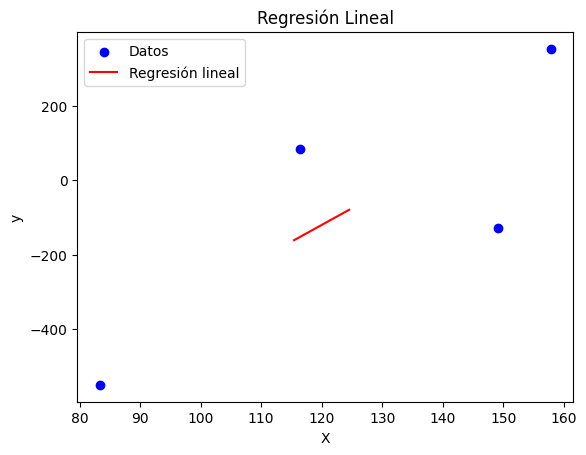

In [150]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([83.32295989990234, 116.47792053222656, 157.8387908935547, 149.12184143066406]).reshape(-1, 1)  # Variable independiente (característica)
y = np.array([-550.00,84.89,352.35,-128.67])       # Variable dependiente (resultado)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Predecir valores
X_new = np.array([115.44953155517578, 120.25, 124.5500030517578]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Coeficientes del modelo (pendiente y ordenada al origen)
coef = model.coef_
intercept = model.intercept_

# Imprimir los coeficientes
print("Pendiente:", coef[0])
print("Ordenada al origen:", intercept)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_new, y_pred, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.show()



In [152]:
y_pred

array([-161.35688057, -118.22451206,  -79.58884174])

Coeficiente de correlación: 0.800377287268815


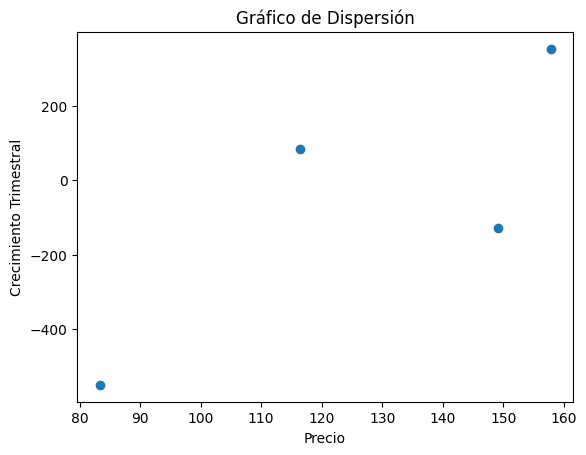

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de precio y crecimiento trimestral

precio = [83.32295989990234, 116.47792053222656, 157.8387908935547, 149.12184143066406]
crecimiento = [-550.00,84.89,352.35,-128.67] # Ejemplo de valores de crecimiento 

# Crear un gráfico de dispersión
plt.scatter(precio, crecimiento)
plt.xlabel('Precio')
plt.ylabel('Crecimiento Trimestral')
plt.title('Gráfico de Dispersión')

# Calcular la correlación
correlation = np.corrcoef(precio, crecimiento)[0, 1]
print("Coeficiente de correlación:", correlation)

# Mostrar el gráfico
plt.show()


In [115]:
metrics

,Stock,Standard Deviation,Rango Mínimo Estimado,Rango Máximo Estimado,Rendimiento promedio diario (%),Rendimiento promedio mensual (%),Rendimiento promedio anual (%),Historical Volatility,Realized Volatility,Net Income (Pri. Tri),Net Income (Ult. Tri),Dividendos,Retentio Ratio,ROE (%),Sustainable Growth Rate (%),Historical Growth Rate (%)
0,A,40.380049,79.369951,160.130049,0.070364,1.242421,17.123556,6.354530,1.624580,274000000,302000000,-66000000,1.218543,23.45,28.574834,1.965036
1,AA,14.011931,20.508070,48.531931,0.067836,0.980131,16.992027,3.743251,3.159336,549000000,-102000000,-18000000,0.823529,-2.52,-2.075294,-123.715847
2,AAME,0.751532,1.068468,2.571532,0.065728,0.106849,-3.691327,0.866910,4.404625,284000000,-145000000,0,1.000000,1.25,1.250000,-130.211268
3,AAON,21.376307,78.073690,120.826304,0.114815,2.041958,30.095244,4.623452,2.118916,1806000000,3681000000,-646000000,1.175496,19.55,22.980943,15.305391
4,AAP,35.631060,35.008939,106.271059,0.025739,0.326789,7.211349,5.969176,2.137483,13979000000,4265000000,-8949000000,3.098242,17.29,53.568596,-21.134223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,ZEUS,8.703559,43.216440,60.623557,0.096760,0.910563,16.316722,2.950179,3.544548,373000000,987000000,-139000000,1.140831,19.34,22.063668,21.484722
2490,ZG,29.019123,23.370876,81.409123,0.124550,2.494697,39.728088,5.386940,3.398434,16000000,-22000000,0,1.000000,-1.79,-1.790000,-147.500000
2491,ZION,12.426333,18.273667,43.126334,0.054285,1.012896,10.769917,3.525100,2.286178,201000000,175000000,-69000000,1.394286,14.55,20.286857,-2.732356
2492,ZTR,1.081553,5.018447,7.181553,0.026847,0.383585,6.381746,1.039977,1.279504,3328000000,-581000000,-2544000000,-3.378657,-1.23,4.155749,-123.491587


## CORRELACION

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
# Para extraer los precios de las acciones al final de los meses donde se da la informacion trimestral
def get_last_adj_close_of_month(df, year, month):
    # Convertir las columnas 'Date' a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filtrar el DataFrame para el año y mes dados
    filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    
    # Ordenar el DataFrame por fecha en orden descendente
    filtered_df = filtered_df.sort_values(by='Date', ascending=False)
    
    # Obtener el último valor de 'Adj Close' si hay datos en el DataFrame filtrado
    if not filtered_df.empty:
        last_adj_close = filtered_df.iloc[0]['Adj Close']
        return last_adj_close
    else:
        return None



# Extraer el último 'Adj Close' del mes 1 (enero) de 2013
get_last_adj_close_of_month(SPG, year=2022, month=12)


113.84919738769533

In [84]:
data.drop(columns=['Dividends'], inplace=True)


In [79]:
data['Net Income'] = [2440000000 , 2100000000 , 1110000000 , 2250000000 , 2140000000]
data['Price'] = [130.1768035888672 , 121.39923095703124, 74.48925018310547 , 145.7879638671875 , 113.84919738769533]
data['Free Cash Flow'] = [-4400000000 , -2570000000 , 2010000000 , -3580000000 , -3080000000]

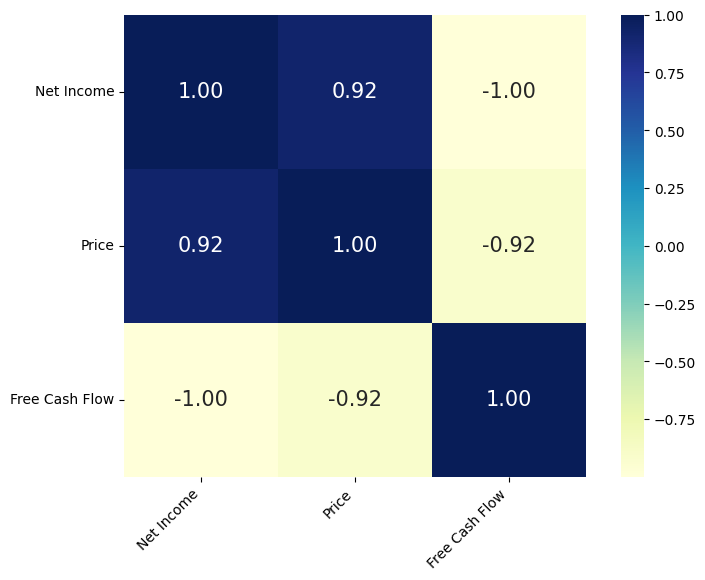

In [85]:

# data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
fig = plt.figure(figsize= (9,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

## REGRESION LINEAL 

[84.57100673]


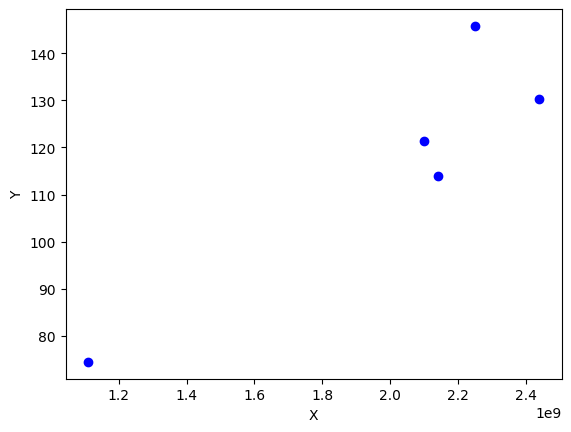

In [170]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Preparar los datos
x = np.array(data['Net Income'])
y = np.array(data['Price'])

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
x_reshaped = x.reshape(-1, 1)
model.fit(x_reshaped, y)

# Hacer predicciones
new_x = np.array(1317500000.0)
new_x_reshaped = new_x.reshape(-1, 1)
predictions = model.predict(new_x_reshaped)
print(predictions)

# Visualizar los resultados
plt.scatter(x, y, color='blue')
plt.plot(new_x, predictions, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [113]:
data['Price']

0    130.176804
1    121.399231
2     74.489250
3    145.787964
4    113.849197
Name: Price, dtype: float64

In [110]:
predictions

array([5.8, 6.4, 7. ])

## Series de tiempo 

# CON PROPHET

In [173]:
from prophet import Prophet

c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [362]:
# Prophet trabaja la columna fecha con el nombre 'ds' y la columna con las etiquetas con el nombre 'y'

data = pd.DataFrame()
data['Date'] = A['Date']
data['Price'] = A['Adj Close']
data.rename(columns= {'Date': 'ds', 'Price' : 'y'}, inplace = True)



In [373]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality=True, uncertainty_samples=50, mcmc_samples=50, interval_width=0.6)

# Entrenamos el modelo
prophet.fit(data)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 4 años.
build_forecast = prophet.make_future_dataframe(periods=(30), freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

19:09:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:01 Iteration:  1 / 50 [  2%]  (Warmup)
chain 1 |          | 00:02 Iteration: 26 / 50 [ 52%]  (Sampling)




chain 1 |██████████| 00:18 Sampling completed                   
chain 2 |██████████| 00:18 Sampling completed                   
chain 3 |██████████| 00:18 Sampling completed                   
chain 4 |██████████| 00:18 Sampling completed                   


19:10:06 - cmdstanpy - INFO - CmdStan done processing.
19:10:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'C:/Users/runneradmin/AppData/Local/Temp/tmpj_ap_iv6/cmdstan-2.31.0/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector

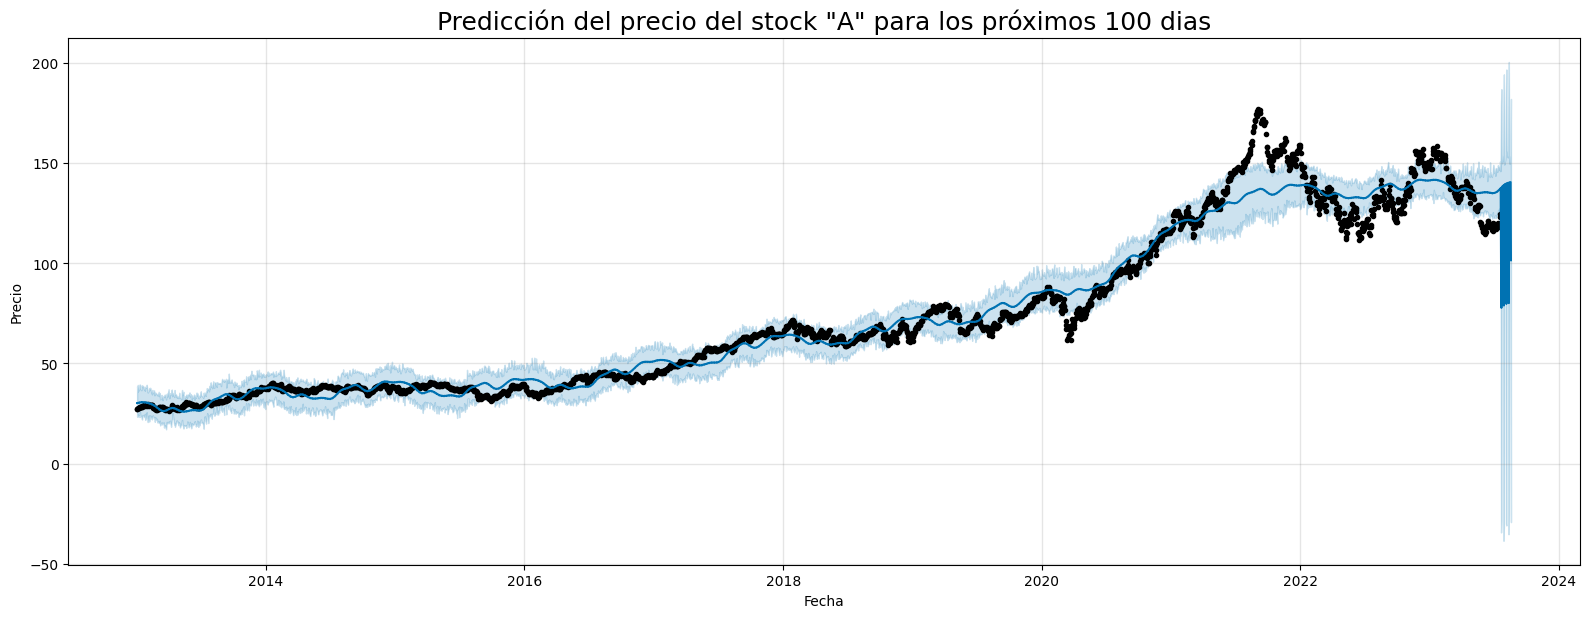

In [374]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Precio', figsize = (16,6))
plt.title('Predicción del precio del stock "A" para los próximos 100 dias', fontsize = 18)
plt.show()

In [219]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,37.243094,29.536502,33.702967,28.438651,30.688107,-6.771239,0.122110,2.075960,-10.275297,-2.559551,-1.491507,3.504059,3.448615,3.688197,0.0,0.0,0.0,30.471855
1,2013-01-03,37.267008,26.596338,33.100373,28.461923,30.710595,-6.640920,-0.168712,2.133885,-10.171282,-2.981405,-1.282250,3.530362,3.475937,3.706502,0.0,0.0,0.0,30.626088
2,2013-01-04,37.290922,28.532746,33.343380,28.485195,30.733083,-6.599894,0.133158,2.125883,-10.152544,-2.713686,-1.347341,3.552649,3.438854,3.779100,0.0,0.0,0.0,30.691028
3,2013-01-07,37.362665,28.381218,33.125777,28.555010,30.800547,-6.575352,0.322119,1.961923,-10.165127,-2.585402,-1.546078,3.589776,3.199215,3.957733,0.0,0.0,0.0,30.787313
4,2013-01-08,37.386579,26.376249,31.813202,28.578282,30.823035,-6.720623,0.352901,1.786349,-10.311604,-2.890980,-1.538551,3.590982,3.112124,3.963445,0.0,0.0,0.0,30.665957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,2023-08-15,144.453496,130.514872,137.344868,136.337928,146.109334,-9.684503,-2.227962,-0.670439,-10.311604,-2.890980,-1.538551,0.627101,0.531625,0.999351,0.0,0.0,0.0,134.768993
2681,2023-08-16,144.446551,130.732658,138.052498,136.342764,146.124403,-9.592243,-1.993434,-0.828874,-10.275297,-2.559551,-1.491507,0.683054,0.534163,1.060597,0.0,0.0,0.0,134.854308
2682,2023-08-17,144.439606,129.891693,137.286835,136.352696,146.139473,-9.429930,-2.134677,-0.207106,-10.171282,-2.981405,-1.282250,0.741352,0.540951,1.100537,0.0,0.0,0.0,135.009676
2683,2023-08-18,144.432660,130.570875,136.392484,136.362627,146.144730,-9.349830,-2.048967,-0.601551,-10.152544,-2.713686,-1.347341,0.802713,0.580780,1.113776,0.0,0.0,0.0,135.082830


# CON ARIMA

In [255]:
### Verificamos la estacionariedad

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(data['Price'])

In [256]:
#H0: No es estacionaria
#H1: Es estacionaria

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
    else:
        print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

In [257]:
adfuller_test(data['Price'])

ADF Test Statistic : -0.7194173702079683
p-value : 0.841655690512973
#Lags Used : 6
Number of Observations Used : 2648
Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.


In [258]:
data['Price'],data['Price'].shift(1)

(0        27.338415
 1        27.436333
 2        27.978132
 3        27.775778
 4        27.553831
            ...    
 2650    119.750000
 2651    118.250000
 2652    119.559998
 2653    123.080002
 2654    124.550003
 Name: Price, Length: 2655, dtype: float64,
 0              NaN
 1        27.338415
 2        27.436333
 3        27.978132
 4        27.775778
            ...    
 2650    119.349998
 2651    119.750000
 2652    118.250000
 2653    119.559998
 2654    123.080002
 Name: Price, Length: 2655, dtype: float64)

In [259]:
data['Price First Difference'] = data['Price'] - data['Price'].shift(1)

In [260]:
data['Price First Difference'].head(12)

0          NaN
1     0.097918
2     0.541800
3    -0.202354
4    -0.221947
5     0.744175
6     0.208895
7    -0.156677
8     0.071806
9    -0.195835
10   -0.124025
11    0.535278
Name: Price First Difference, dtype: float64

In [266]:
data['Seasonal First Difference']= data['Price'] - data['Price'].shift(21)

In [267]:
data.head(14)

,Date,Price,Price First Difference,Seasonal First Difference
0,2013-01-02,27.338415,NaN,NaN
1,2013-01-03,27.436333,0.097918,NaN
2,2013-01-04,27.978132,0.541800,NaN
3,2013-01-07,27.775778,-0.202354,NaN
4,2013-01-08,27.553831,-0.221947,NaN
5,2013-01-09,28.298006,0.744175,NaN
6,2013-01-10,28.506901,0.208895,NaN
7,2013-01-11,28.350224,-0.156677,NaN
8,2013-01-14,28.422029,0.071806,NaN
9,2013-01-15,28.226194,-0.195835,NaN


In [269]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.683787210419672
p-value : 4.276467647088531e-09
#Lags Used : 25
Number of Observations Used : 2608
El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


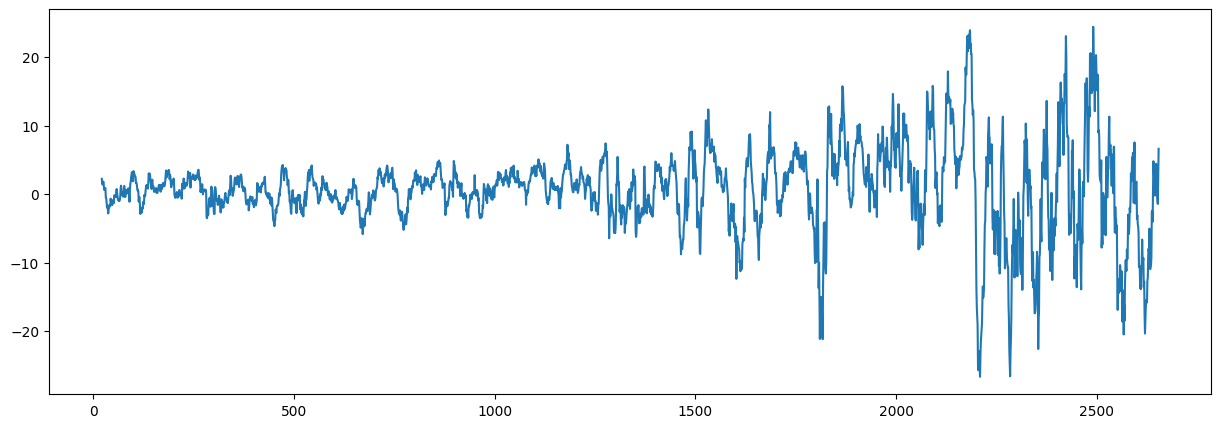

In [271]:
plt.figure(figsize=(15,5))

plt.plot(data['Seasonal First Difference'])
plt.show()

In [275]:
from statsmodels.tsa.arima.model import ARIMA

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Crear el DataFrame con tus datos
data = pd.DataFrame({
    'Date': ['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06'],
    'Price': [27.338415, 27.475596, 27.925469, 27.607425, 27.659574]
})

# Convertir la columna 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'])

# Establecer 'Date' como el índice del DataFrame
data.set_index('Date', inplace=True)

# Ajustar el modelo ARIMA
model = ARIMA(data['Price'], order=(1, 1, 1))
results = model.fit()

# Obtener el resumen del modelo
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                    5
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -0.326
Date:                Sat, 19 Aug 2023   AIC                              6.652
Time:                        18:41:05   BIC                              4.811
Sample:                    01-02-2013   HQIC                             2.612
                         - 01-06-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2914      7.265      0.040      0.968     -13.947      14.530
ma.L1         -0.9911    294.135     -0.003      0.997    -577.485     575.502
sigma2         0.0520     15.042      0.003      0.9

c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_va

In [303]:
# Realizar pronósticos
forecast_steps = 20  # Número de pasos de pronóstico que deseas
forecast = results.forecast(steps=forecast_steps)

# Imprimir los pronósticos
print("Pronósticos:")
print(forecast)



Pronósticos:
2013-01-07    27.608063
2013-01-08    27.593055
2013-01-09    27.588682
2013-01-10    27.587408
2013-01-11    27.587037
2013-01-12    27.586928
2013-01-13    27.586897
2013-01-14    27.586888
2013-01-15    27.586885
2013-01-16    27.586884
2013-01-17    27.586884
2013-01-18    27.586884
2013-01-19    27.586884
2013-01-20    27.586884
2013-01-21    27.586884
2013-01-22    27.586884
2013-01-23    27.586884
2013-01-24    27.586884
2013-01-25    27.586884
2013-01-26    27.586884
Freq: D, Name: predicted_mean, dtype: float64


In [304]:
# Crear un índice de fechas para los pasos de pronóstico
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Crear un DataFrame con los pronósticos
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Concatenar el DataFrame original y el DataFrame de pronósticos
data_forecast = pd.concat([data, forecast_df])

# Imprimir el DataFrame con pronósticos
print(data_forecast)


                Price   Forecast
2013-01-02  27.338415        NaN
2013-01-03  27.475596        NaN
2013-01-04  27.925469        NaN
2013-01-05  27.607425        NaN
2013-01-06  27.659574        NaN
2013-01-07        NaN  27.608063
2013-01-08        NaN  27.593055
2013-01-09        NaN  27.588682
2013-01-10        NaN  27.587408
2013-01-11        NaN  27.587037
2013-01-12        NaN  27.586928
2013-01-13        NaN  27.586897
2013-01-14        NaN  27.586888
2013-01-15        NaN  27.586885
2013-01-16        NaN  27.586884
2013-01-17        NaN  27.586884
2013-01-18        NaN  27.586884
2013-01-19        NaN  27.586884
2013-01-20        NaN  27.586884
2013-01-21        NaN  27.586884
2013-01-22        NaN  27.586884
2013-01-23        NaN  27.586884
2013-01-24        NaN  27.586884
2013-01-25        NaN  27.586884
2013-01-26        NaN  27.586884


In [292]:
# Ajustar el modelo ARIMA
model = ARIMA(data['Price'], order=(1,1,1))  # Reemplaza p, d y q con los órdenes adecuados
results = model.fit()

# Obtener el resumen del modelo
print(results.summary())

# Generar pronósticos
forecast_steps = 30  # Número de pasos hacia adelante para predecir
forecast = results.forecast(steps=forecast_steps)

# Visualizar los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast of Stock Prices')
plt.legend()
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [282]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 2655
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4733.956
Date:                            Sat, 19 Aug 2023   AIC                           9477.911
Time:                                    18:31:28   BIC                           9507.308
Sample:                                         0   HQIC                          9488.554
                                           - 2655                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5676      0.148      3.836      0.000       0.278       0.858
ma.L1         -0.6125      0.142     -4.300      0.000      -0.892      -0.333
ar.S.L12      -0.0224      0.014     -1.620      0.105      -0.049       0.005
ma.S.L12      -0.9997      0.097    -10.316      0.000      -1.190      -0.810
sigma2         2.0571      0.197     10.441      0.000       1.671       2.443
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6724.02
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              19.56   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [287]:
data['forecast']=results.predict(start=30,end=2000,dynamic=True)

In [288]:
data

,Date,Price,Price First Difference,Seasonal First Difference,forecast
0,2013-01-02,27.338415,NaN,NaN,NaN
1,2013-01-03,27.436333,0.097918,NaN,NaN
2,2013-01-04,27.978132,0.541800,NaN,NaN
3,2013-01-07,27.775778,-0.202354,NaN,NaN
4,2013-01-08,27.553831,-0.221947,NaN,NaN
...,...,...,...,...,...
2650,2023-07-14,119.750000,0.400002,0.477768,NaN
2651,2023-07-17,118.250000,-1.500000,-0.922424,NaN
2652,2023-07-18,119.559998,1.309998,-1.438942,NaN
2653,2023-07-19,123.080002,3.520004,2.180878,NaN


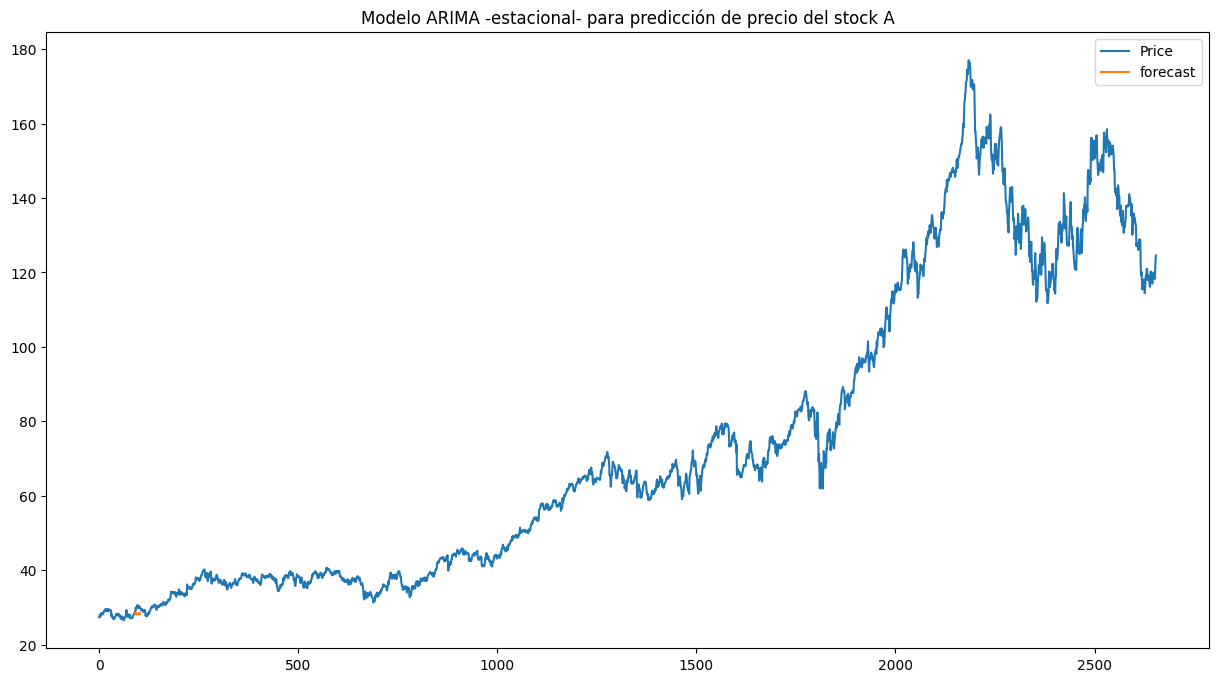

In [283]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Price','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -estacional- para predicción de precio del stock A')
plt.show()

In [284]:
data

,Date,Price,Price First Difference,Seasonal First Difference,forecast
0,2013-01-02,27.338415,NaN,NaN,NaN
1,2013-01-03,27.436333,0.097918,NaN,NaN
2,2013-01-04,27.978132,0.541800,NaN,NaN
3,2013-01-07,27.775778,-0.202354,NaN,NaN
4,2013-01-08,27.553831,-0.221947,NaN,NaN
...,...,...,...,...,...
2650,2023-07-14,119.750000,0.400002,0.477768,NaN
2651,2023-07-17,118.250000,-1.500000,-0.922424,NaN
2652,2023-07-18,119.559998,1.309998,-1.438942,NaN
2653,2023-07-19,123.080002,3.520004,2.180878,NaN


# Random walk

In [344]:
A['Date'][1858]

Timestamp('2020-05-20 00:00:00')

In [356]:
from sklearn.metrics import mean_absolute_error

In [354]:
# Selección fechas train-test
# ==============================================================================
inicio_train = '2013-01-02 00:00:00'
fin_train = '2020-05-20 00:00:00'

print(f"Serie temporal completa : {A['Date'].min()} --- {A['Date'].max()}  (n={len(A)})")
print(f"Fechas train            : {A['Date'][0]} --- {A['Date'].loc[inicio_train:fin_train].max()}  (n={len(A.loc[inicio_train:fin_train])})")
print(f"Fechas test             : {A['Date'].loc[fin_train:].min()} --- {A['Date'].loc[fin_train:].max()}  (n={len(A.loc[fin_train:])})")

Serie temporal completa : 2013-01-02 00:00:00 --- 2023-07-20 00:00:00  (n=2655)
Fechas train            : 2013-01-02 00:00:00 --- 2021-01-11 00:00:00  (n=7)
Fechas test             : 2021-01-12 00:00:00 --- 2023-07-20 00:00:00  (n=634)


In [360]:
# Simulación Random Walk
# ==============================================================================
df_rw = A[['Adj Close']].copy()
df_rw['pred_price'] = df_rw['Adj Close'].shift(1)

# Error de test
# ==============================================================================
y_true = df_rw.loc[fin_train:, 'Adj Close']
y_pred = df_rw.loc[fin_train:, 'pred_price']
metrica = mean_absolute_error(y_true, y_pred)

print(f'Error de test: {metrica}')
display(df_rw.loc[fin_train:,].head(4))

Error de test: 1.8124997472913484


,Adj Close,pred_price
2021,125.018623,126.180489
2022,125.028473,125.018623
2023,124.093063,125.028473
2024,124.270287,124.093063


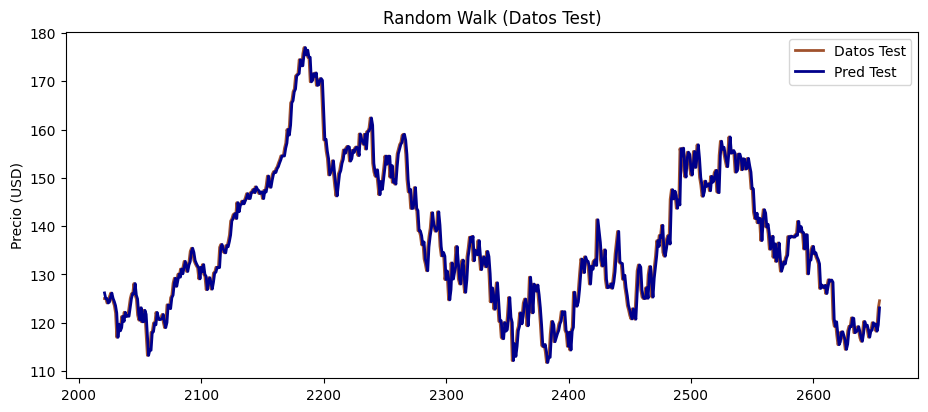

In [378]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4.5))
df_rw.loc[fin_train:, 'Adj Close'].plot(ax=ax, linewidth=2, label='Datos Test',
                                    c='sienna')
df_rw.loc[fin_train:, 'pred_price'].plot(ax=ax, linewidth=2, label='Pred Test',
                                    c='darkblue')
ax.set_title('Random Walk (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend()

In [379]:
# DataFrame errores test modelos
# ==============================================================================
df_errores = pd.DataFrame({'modelo': 'Base - Random Walk', 'lags': 1, 
                           'error_test': metrica, 'variables_exog': False},
                          index=[0])
df_errores

,modelo,lags,error_test,variables_exog
0,Base - Random Walk,1,1.8125,False


In [390]:
pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
     ------------                             0.4/1.3 MB 8.3 MB/s eta 0:00:01
     -------------------------                0.8/1.3 MB 8.7 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [391]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [434]:
# Backtest forecasters con diferentes lags
# ==============================================================================
lags = [1, 2, 3, 4, 5, 6,7,8,9,7]  # Ajusta los lags de acuerdo a tus necesidades
metricas = []
predicciones_list = []

for lag in lags:
    
    # Crear forecaster
    forecaster = ForecasterAutoreg(
                     regressor     = LGBMRegressor(random_state=123),
                     lags          = lag,
                     transformer_y = None
                 )  
    
    # Backtest test data 1 step
    metrica, predicciones = backtesting_forecaster(
                                forecaster         = forecaster,
                                y                  = A.loc[inicio_train:, 'Adj Close'],
                                initial_train_size = len(A.loc[inicio_train:fin_train, 'Adj Close']),
                                fixed_train_size   = True,
                                steps              = 1,
                                refit              = True,
                                metric             = 'mean_absolute_error',
                                verbose            = False
                            )
    
    metricas.append(metrica)
    predicciones_list.append(predicciones)

c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 6, number of used features: 0
[LightGBM] [Info] Start training from score 121.849751
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:11<00:00, 53.43it/s]
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 122.856372
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:09<00:00, 65.38it/s]
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 124.127529
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:08<00:00, 73.14it/s]
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 125.169599
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:08<00:00, 78.60it/s]
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 125.643860
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:08<00:00, 75.29it/s]
c:\Users\Leidy Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\model_selection\model_selection.py:527: LongTrainingWarning: The forecaster will be fit 634 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1, number of used features: 0
[LightGBM] [Info] Start training from score 126.180489
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

100%|██████████| 634/634 [00:09<00:00, 65.64it/s]


ValueError: The maximum lag (7) must be less than the length of the series (7).

In [416]:
len(predicciones_list[0])

634

In [433]:
predicciones_list[5]['pred'][2022]

125.01862335205078

In [ ]:
# Backtest forecasters con diferentes lags
# ==============================================================================
lags = [1, 2, 3, 4, 5, 6,7,8,9,7]  # Ajusta los lags de acuerdo a tus necesidades
metricas = []
predicciones_list = []

for lag in lags:
    
    # Crear forecaster
    forecaster = ForecasterAutoreg(
                     regressor     = LGBMRegressor(random_state=123),
                     lags          = lag,
                     transformer_y = None
                 )  
    
    # Backtest test data 1 step
    metrica, predicciones = backtesting_forecaster(
                                forecaster         = forecaster,
                                y                  = A.loc[inicio_train:, 'Adj Close'],
                                initial_train_size = len(A.loc[inicio_train:fin_train, 'Adj Close']),
                                fixed_train_size   = True,
                                steps              = 1,
                                refit              = True,
                                metric             = 'mean_absolute_error',
                                verbose            = False
                            )
    
    metricas.append(metrica)
    predicciones_list.append(predicciones)

## Redes LSTM

In [450]:
set_entrenamiento = A['Adj Close'][:1858]
set_validacion = A['Adj Close'][1858:]

In [460]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convertir la Serie en un array de NumPy
set_entrenamiento_array = set_entrenamiento.values

# Reshape y escalamiento
set_entrenamiento_array = set_entrenamiento_array.reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0, 1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento_array)



In [462]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [463]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [471]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.57.0-cp311-cp311-win_amd64.whl (4.3 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.4-py3-none-any.whl (94 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [473]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [474]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [475]:
modelo = Sequential()

In [476]:
modelo.add(LSTM(units=na, input_shape=dim_entrada))

In [477]:
modelo.add(Dense(units=dim_salida))

In [478]:
modelo.compile(optimizer='rmsprop', loss='mse')

In [479]:
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
57/57 [==============================] - 3s 16ms/step - loss: 0.0088
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 8.9484e-04
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 8.8761e-04
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 7.7679e-04
Epoch 8/20
57/57 [==============================] - 1s 14ms/step - loss: 7.5692e-04
Epoch 9/20
57/57 [==============================] - 1s 14ms/step - loss: 6.4837e-04
Epoch 10/20
57/57 [==============================] - 1s 14ms/step - loss: 6.3139e-04
Epoch 11/20
57/57 [==============================] - 1s 15ms/step - loss: 6.1270e-04
Epoch 12/20
57/57 [==============================] - 1s 14ms/step - loss: 5.9438e-04
Epoch

In [481]:
x_test = set_validacion.values
x_test = x_test.reshape(-1, 1)  # Convierte la serie en una matriz unidimensional
x_test = sc.transform(x_test)    # Aplica la transformación

In [482]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [483]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

24/24 [==============================] - 1s 7ms/step


In [489]:
len(A) - len(prediccion)

1918

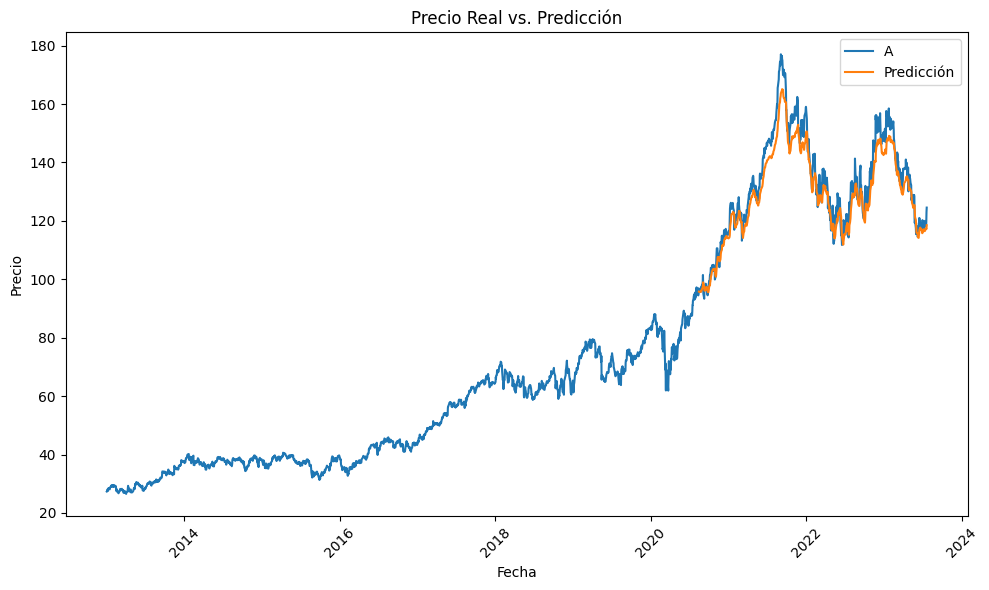

In [490]:
import matplotlib.pyplot as plt

# Asumiendo que 'A' es tu DataFrame original con las fechas y precios reales
# Asumiendo que 'fechas_prediccion' es una lista de fechas correspondientes a tus predicciones
# Asumiendo que 'prediccion' es una lista/array de precios predichos

plt.figure(figsize=(10, 6))
plt.plot(A['Date'], A['Adj Close'], label='A')
plt.plot(A['Date'][1918:], prediccion, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Real vs. Predicción')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [491]:
A.tail()

,Date,Open,Close,Adj Close,Volume
2650,2023-07-14,119.540001,119.750000,119.750000,1225400
2651,2023-07-17,119.949997,118.250000,118.250000,1123000
2652,2023-07-18,118.379997,119.559998,119.559998,1362700
2653,2023-07-19,120.010002,123.080002,123.080002,2425400
2654,2023-07-20,123.510002,124.550003,124.550003,2263581


In [492]:
prediccion

array([[ 95.77884 ],
       [ 95.652695],
       [ 95.62846 ],
       [ 95.70595 ],
       [ 95.78414 ],
       [ 95.78605 ],
       [ 95.94385 ],
       [ 95.84136 ],
       [ 95.99664 ],
       [ 96.389275],
       [ 96.57126 ],
       [ 96.97368 ],
       [ 97.40567 ],
       [ 97.91995 ],
       [ 98.96428 ],
       [ 98.56396 ],
       [ 97.49388 ],
       [ 96.21348 ],
       [ 96.09605 ],
       [ 96.14257 ],
       [ 96.19472 ],
       [ 96.49622 ],
       [ 97.002   ],
       [ 97.23813 ],
       [ 97.332535],
       [ 97.33927 ],
       [ 96.9693  ],
       [ 96.85493 ],
       [ 96.24426 ],
       [ 95.65086 ],
       [ 95.61896 ],
       [ 96.11833 ],
       [ 96.68446 ],
       [ 97.323395],
       [ 97.87555 ],
       [ 97.919624],
       [ 98.94381 ],
       [ 99.18266 ],
       [100.04976 ],
       [100.712585],
       [101.65909 ],
       [102.21005 ],
       [102.59967 ],
       [102.75181 ],
       [102.91868 ],
       [103.41846 ],
       [103.379745],
       [103.3